##  Shifted Schwefel’s (F2) with Dimension 500

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

In [2]:
dataset = pd.read_csv("Schwefel_dataset_data.csv")
data = dataset["val"].tolist()

In [3]:
Dims = 500
bias = -450
lower_bound = -100
upper_bound = 100

In [4]:
def func(x):
    F = abs(x[0]- data[0])
    for i in range(1,Dims - 1):
        z = x[i] - data[i]
        F = max(F, abs(z))
    func = F + bias
    return func

In [7]:
def Solution(func):
    global EachSol
    x_min = lower_bound * np.ones(Dims)
    x_max = upper_bound * np.ones(Dims)
    x0 = np.random.uniform(min(x_min), max(x_max), (1, Dims))
    EachSol=[]
    sol = minimize(func,x0,bounds=(x_min,x_max),method='Nelder-Mead',tol=1e-5, callback = AllSol)
    print("Best position: ", sol.x)
    print()
    print("Value: {:.2f}".format(sol.fun))
    print(sol)

In [8]:
def AllSol(xk):    
    global EachSol
    EachSol.append(func(xk))
start_time = time.time()
Final = Solution(func)


print("Computational time: {:.2f} seconds".format(time.time()-start_time))

d:\anaconda\anacondacore\envs\mytfenv\lib\site-packages\scipy\optimize\_minimize.py:534: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


Best position:  [ 9.64075055e-01 -7.13494858e+01 -3.89758771e+01  3.69083486e+01
 -7.03826933e+01  6.24344090e+01  8.33605361e+01  4.00498873e+01
  8.19410664e+01  9.60666698e+01  6.44405689e+01 -2.37621756e+01
 -7.47596386e+01 -6.80607551e+01 -3.22910500e+01  5.43728978e+01
 -9.88737180e+01 -4.17227135e+01 -1.00507210e+02 -1.18083279e+01
 -2.48412048e+01 -5.68233334e+01  9.10587284e+01 -1.29451009e+01
  8.11991537e+01  4.50997982e+01 -5.46927362e+01  5.40333570e+01
  2.98892339e+00 -7.94872718e+01  1.06326622e+01 -1.81212136e+01
 -9.80316774e+01  8.78548908e+01 -3.95301480e+01  5.30566189e+01
  6.00139067e+01 -4.22117438e+01  6.39324811e+01 -1.06048745e+02
  3.16108967e+01 -9.91231591e+01 -4.60241336e+01  1.06852550e+02
 -1.23619075e+01 -3.86819095e+01 -2.43255692e+01 -2.69922071e+01
 -6.39686790e+01 -9.77808732e+00  6.97835631e+01  4.11079309e+01
 -3.36783473e+01  1.25209803e+01  5.32103928e+01  2.45126745e+01
 -7.26778233e+01  2.60068445e+01 -1.17668961e+02 -8.40926220e+01
 -1.01166

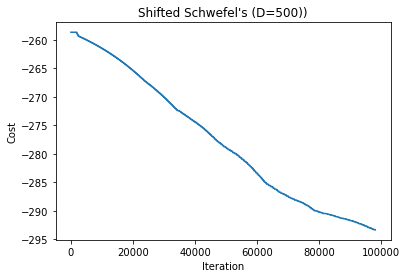

In [14]:
plt.plot(EachSol)
plt.title("Shifted Schwefel's (D=500))")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()